# 최종 모델 코드

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, precision_score, recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import lightgbm as lgb
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import warnings
from sklearn.cluster import KMeans

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

##### 데이터 로드

In [26]:
data_dir = "D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\"
# data_dir = "C:\\KIMUJUNG\\team_project\\data\\"
df = pd.read_csv(data_dir + 'final_data.csv')
df.head(2)

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.0,1.0,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.0,0.0,...,2,145,84,58,42,1678,1158,448313.054,2168,220


##### 전처리

In [27]:
X = df.drop(['is_churn'],axis=1)
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 오버샘플링

In [19]:
ros = RandomOverSampler( random_state=42)
X_train_res_1, y_train_res_1 = ros.fit_resample(X_train, y_train)
X_test_res_1, y_test_res_1 = ros.fit_resample(X_test, y_test)

In [20]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf_over = DecisionTreeClassifier(max_depth=53, random_state=42)

dt_accuracy_over = []
dt_precision_over = []
dt_recall_over = []
dt_matrix_over = []
dt_curve_over = []

scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_res_1)
X_test_scaled_1 = scaler.transform(X_test_res_1)

dt_clf_over.fit(X_train_scaled_1, y_train_res_1)
y_pred_dt = dt_clf_over.predict(X_test_scaled_1)   # 검증 데이터로 예측
y_pred_proba = dt_clf_over.predict_proba(X_test_scaled_1)[:, 1]

dt_accuracy_over.append(accuracy_score(y_test_res_1, y_pred_dt))
dt_precision_over.append(precision_score(y_test_res_1, y_pred_dt))
dt_recall_over.append(recall_score(y_test_res_1, y_pred_dt))
dt_matrix_over.append(confusion_matrix(y_test_res_1, y_pred_dt))
dt_curve_over.append(roc_curve(y_test_res_1, y_pred_proba))

print("의사결정나무 정확도:", round(np.mean(dt_accuracy_over),3))
print("의사결정나무 정밀도:", round(np.mean(dt_precision_over),3))
print("의사결정나무 재현율:", round(np.mean(dt_recall_over),3))

의사결정나무 정확도: 0.715
의사결정나무 정밀도: 0.843
의사결정나무 재현율: 0.53


In [21]:
stratified_kfold = StratifiedKFold(n_splits=5)
rf_clf_over = RandomForestClassifier(max_depth= 61, n_estimators= 100, random_state=42, warm_start=True)

rf_accuracy_over = []
rf_precision_over = []
rf_recall_over = []
rf_matrix_over = []
rf_curve_over = []

scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_res_1)
X_test_scaled_1 = scaler.transform(X_test_res_1)

rf_clf_over.fit(X_train_scaled_1, y_train_res_1)
y_pred_rf = rf_clf_over.predict(X_test_scaled_1)
y_pred_proba = rf_clf_over.predict_proba(X_test_scaled_1)[:, 1]

rf_accuracy_over.append(accuracy_score(y_test_res_1, y_pred_rf))
rf_precision_over.append(precision_score(y_test_res_1, y_pred_rf))
rf_recall_over.append(recall_score(y_test_res_1, y_pred_rf))
rf_matrix_over.append(confusion_matrix(y_test_res_1, y_pred_rf))
rf_curve_over.append(roc_curve(y_test_res_1, y_pred_proba))

print("RF 정확도:", round(np.mean(rf_accuracy_over),3))
print("RF 정밀도:", round(np.mean(rf_precision_over),3))
print("RF 재현율:", round(np.mean(rf_recall_over),3))

RF 정확도: 0.781
RF 정밀도: 0.905
RF 재현율: 0.629


In [6]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(sampling_strategy=0.4, random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_res_scaled = scaler.transform(X_test_res)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 117521})


### 의사결정나무

In [ ]:
# skf = StratifiedKFold(n_splits=5)
# dt_clf = DecisionTreeClassifier(random_state=42)
# params = {
#     # "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#     "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
# }
# gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
# gscv_tree.fit(X_train_scaled, y_train)
# print(gscv_tree.best_estimator_)

In [18]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=11, random_state=42)

dt_accuracy = []
dt_precision = []
dt_recall = []
dt_matrix = []
dt_curve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train_1, y_train_1 = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    scaler = StandardScaler()
    X_train_scaled_1 = scaler.fit_transform(X_train_1)
    X_test_scaled_1 = scaler.transform(X_val)

    dt_clf.fit(X_train_scaled_1, y_train_1)
    y_pred_dt = dt_clf.predict(X_test_scaled_1)
    y_pred_proba = dt_clf.predict_proba(X_test_scaled_1)[:, 1]

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt))
    dt_precision.append(precision_score(y_val, y_pred_dt))
    dt_recall.append(recall_score(y_val, y_pred_dt))
    dt_matrix.append(confusion_matrix(y_val, y_pred_dt))
    dt_curve.append(roc_curve(y_val, y_pred_proba))

print("의사결정나무 정확도:", round(np.mean(dt_accuracy),3))
print("의사결정나무 정밀도:", round(np.mean(dt_precision),3))
print("의사결정나무 재현율:", round(np.mean(dt_recall),3))

의사결정나무 정확도: 0.876
의사결정나무 정밀도: 0.693
의사결정나무 재현율: 0.53


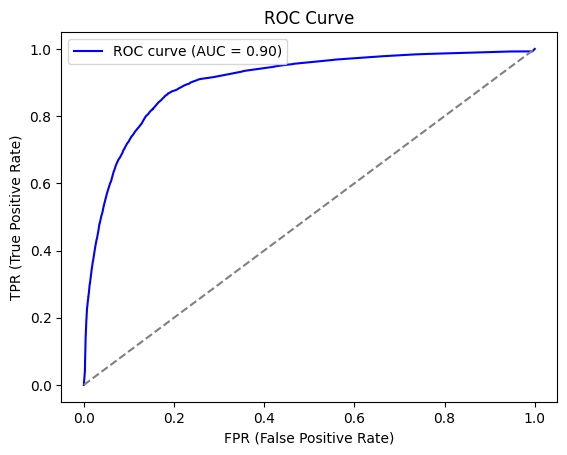

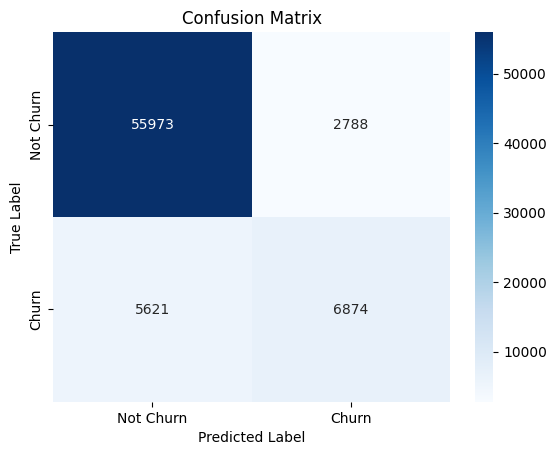

In [38]:
# ROC Curve
fpr, tpr, thresholds = dt_curve[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = dt_matrix[0]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 의사결정나무 오버샘플링

In [ ]:
# skf = StratifiedKFold(n_splits=5)
# dt_clf = DecisionTreeClassifier(random_state=42)
# params = {
#     # "max_depth": [50,55,60,65,70,75,80,85,90,95,100]
#     "max_depth": [51,52,53,54,55,56,57,58,59]
#     # "max_depth": [5,10,15,20,25,30,35,40,45,50]
#     # "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
# }
# gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
# gscv_tree.fit(X_train_scaled, y_train)
# print(gscv_tree.best_estimator_)

In [12]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf_over = DecisionTreeClassifier(max_depth=53, random_state=42)

dt_accuracy_over = []
dt_precision_over = []
dt_recall_over = []
dt_matrix_over = []
dt_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train_1, y_train_1 = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled_1 = scaler.fit_transform(X_train_1)
    X_test_scaled_1 = scaler.transform(X_val)

    dt_clf_over.fit(X_train_scaled_1, y_train_1)
    y_pred_dt = dt_clf_over.predict(X_test_scaled_1)   # 검증 데이터로 예측
    y_pred_proba = dt_clf_over.predict_proba(X_test_scaled_1)[:, 1]

    dt_accuracy_over.append(accuracy_score(y_val, y_pred_dt))
    dt_precision_over.append(precision_score(y_val, y_pred_dt))
    dt_recall_over.append(recall_score(y_val, y_pred_dt))
    dt_matrix_over.append(confusion_matrix(y_val, y_pred_dt))
    dt_curve_over.append(roc_curve(y_val, y_pred_proba))

print("의사결정나무 정확도:", round(np.mean(dt_accuracy_over),3))
print("의사결정나무 정밀도:", round(np.mean(dt_precision_over),3))
print("의사결정나무 재현율:", round(np.mean(dt_recall_over),3))

의사결정나무 정확도: 0.892
의사결정나무 정밀도: 0.765
의사결정나무 재현율: 0.896


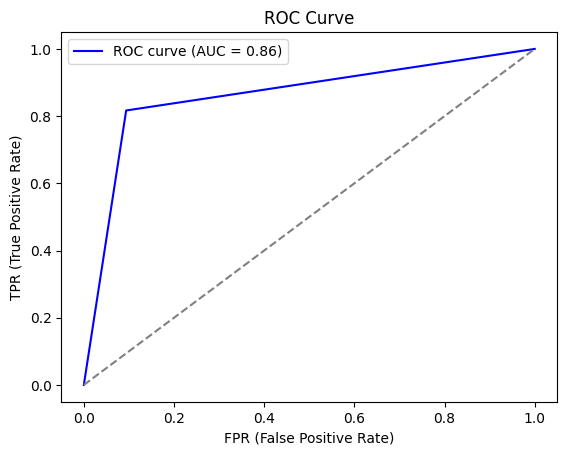

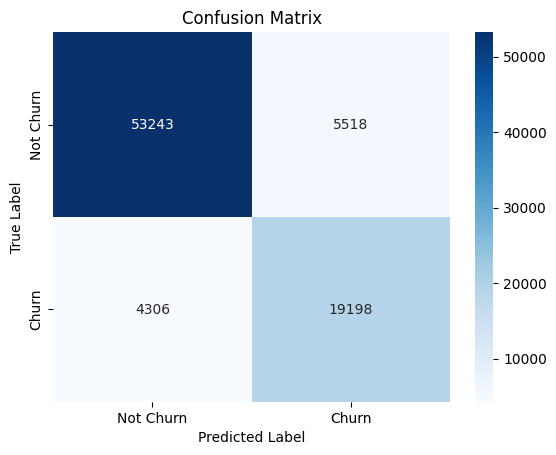

In [14]:
# ROC Curve
fpr, tpr, thresholds = dt_curve_over[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = dt_matrix_over[0]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 랜덤 포레스트

In [ ]:
# stratified_kfold = StratifiedKFold(n_splits=5)
# param_grid = {
#     # 'n_estimators': [50, 100, 150],       # 트리의 개수
#     # 'max_depth': [5, 10, 20, 30, 40, 50]       # 트리의 최대 깊이
#     'n_estimators': [150],       # 트리의 개수
#     # 'max_depth': [45,50,55,60,65,70]       # 트리의 최대 깊이
#     'max_depth': [46,47,48,49,50,51,52,53,54]       # 트리의 최대 깊이
# }

# # RandomForestClassifier 모델 생성
# rf_model = RandomForestClassifier(random_state=42, warm_start=True)

# # GridSearchCV를 이용한 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(rf_model, param_grid=param_grid, scoring="accuracy", cv=stratified_kfold, verbose=2, n_jobs=4)

# # 모델 학습
# grid_search.fit(X_train_scaled, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best Parameters:", grid_search.best_params_)

In [25]:
stratified_kfold = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(max_depth= 51, n_estimators= 150, random_state=42, warm_start=True)

rf_accuracy = []
rf_precision = []
rf_recall = []
rf_matrix = []
rf_curve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train_1, y_train_1 = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    rf_clf.fit(X_train_1, y_train_1)
    y_pred_rf = rf_clf.predict(X_val)
    y_pred_proba = rf_clf.predict_proba(X_val)[:, 1]

    rf_accuracy.append(accuracy_score(y_val, y_pred_rf))
    rf_precision.append(precision_score(y_val, y_pred_rf))
    rf_recall.append(recall_score(y_val, y_pred_rf))
    rf_matrix.append(confusion_matrix(y_val, y_pred_rf))
    rf_curve.append(roc_curve(y_val, y_pred_proba))

print("RF 정확도:", round(np.mean(rf_accuracy),3))
print("RF 정밀도:", round(np.mean(rf_precision),3))
print("RF 재현율:", round(np.mean(rf_recall),3))

RF 정확도: 0.978
RF 정밀도: 0.951
RF 재현율: 0.909


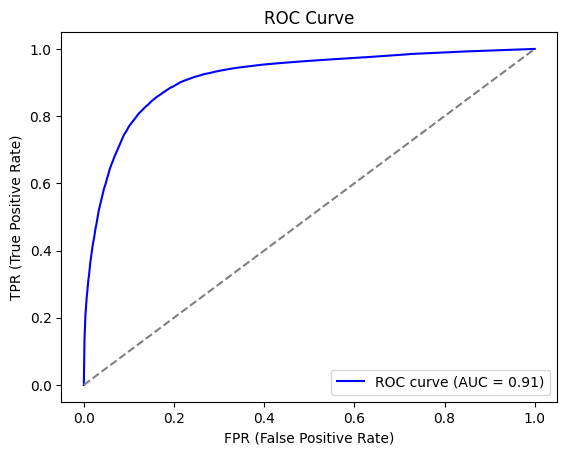

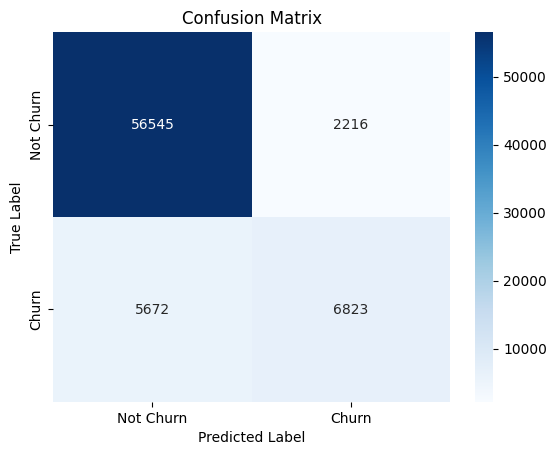

In [36]:
# ROC Curve
fpr, tpr, thresholds = rf_curve[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
# cm = confusion_matrix(y_val, y_pred_rf)
cm = rf_matrix[0]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 랜덤 포레스트 오버샘플링

In [ ]:
# stratified_kfold = StratifiedKFold(n_splits=5)

# param_grid = {
#     # 'n_estimators': [50, 100, 150],       # 트리의 개수
#     # 'max_depth': [5, 10, 20, 30, 40, 50]       # 트리의 최대 깊이
#     # 'max_depth': [45,50,55,60,65,70] ,      # 트리의 최대 깊이
#     # 'max_depth': [61,62,63,64,65,66,67,68,69],       # 트리의 최대 깊이
#     'max_depth': [61,62,63],       # 트리의 최대 깊이
#     'n_estimators': [100]       # 트리의 개수
# }

# # RandomForestClassifier 모델 생성
# rf_model = RandomForestClassifier(random_state=42, warm_start=True)

# # GridSearchCV를 이용한 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(rf_model, param_grid=param_grid, scoring="accuracy", cv=stratified_kfold, verbose=2, n_jobs=4)

# # 모델 학습
# grid_search.fit(X_train_res_scaled, y_train_res)

# # 최적 하이퍼파라미터 출력
# print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'max_depth': 62, 'n_estimators': 100}


In [29]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(sampling_strategy=0.25, random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_res_scaled = scaler.transform(X_test_res)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 73450})


In [12]:
stratified_kfold = StratifiedKFold(n_splits=5)
rf_clf_over = RandomForestClassifier(max_depth= 61, n_estimators= 100, random_state=42, warm_start=True)

rf_accuracy_over = []
rf_precision_over = []
rf_recall_over = []
rf_matrix_over = []
rf_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train_1, y_train_1 = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

    rf_clf_over.fit(X_train_1, y_train_1)
    y_pred_rf = rf_clf_over.predict(X_val)
    y_pred_proba = rf_clf_over.predict_proba(X_val)[:, 1]

    rf_accuracy_over.append(accuracy_score(y_val, y_pred_rf))
    rf_precision_over.append(precision_score(y_val, y_pred_rf))
    rf_recall_over.append(recall_score(y_val, y_pred_rf))
    rf_matrix_over.append(confusion_matrix(y_val, y_pred_rf))
    rf_curve_over.append(roc_curve(y_val, y_pred_proba))

print("RF 정확도:", round(np.mean(rf_accuracy_over),3))
print("RF 정밀도:", round(np.mean(rf_precision_over),3))
print("RF 재현율:", round(np.mean(rf_recall_over),3))

RF 정확도: 0.98
RF 정밀도: 0.966
RF 재현율: 0.944


In [13]:
import pandas as pd

# Feature Importance 확인
feature_importance = rf_clf_over.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # 가장 영향력이 높은 10개 변수 출력

                  Feature  Importance
8           is_auto_renew    0.145635
10      transaction_count    0.095848
19     listening_duration    0.082627
9               is_cancel    0.077307
4        payment_plan_sum    0.056739
18  registration_duration    0.056457
6      actual_amount_paid    0.053616
5         plan_list_price    0.048893
11                 num_25    0.043853
16                num_unq    0.043513


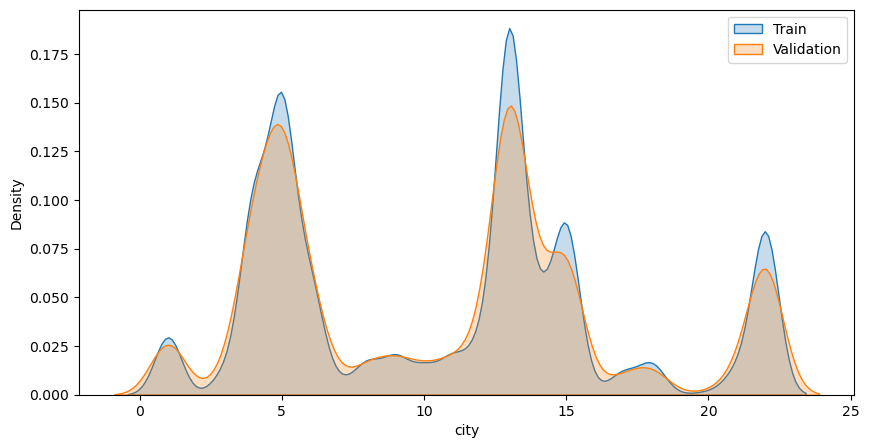

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: 첫 번째 Feature의 분포 확인
plt.figure(figsize=(10,5))
sns.kdeplot(X_train_1.iloc[:, 0], label="Train", fill=True)
sns.kdeplot(X_val.iloc[:, 0], label="Validation", fill=True)
plt.legend()
plt.show()

In [ ]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve

# Stratified K-Fold 설정
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# RandomForest 모델 생성
rf_clf_over = RandomForestClassifier(max_depth=40, n_estimators=100, 
    min_samples_split=10,  # 노드를 분할할 최소 샘플 수 증가
    min_samples_leaf=5,  # 리프 노드의 최소 샘플 수 증가
    random_state=42, warm_start=True)

rf_accuracy_over = []
rf_precision_over = []
rf_recall_over = []
rf_matrix_over = []
rf_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train_1, X_val = X_res.iloc[train_index], X_res.iloc[val_index]
    y_train_1, y_val = y_res.iloc[train_index], y_res.iloc[val_index]

    # 표준화 적용 (각 Fold마다 따로 진행)
    scaler = StandardScaler()
    X_train_1_scaled = scaler.fit_transform(X_train_1)
    X_val_scaled = scaler.transform(X_val)

    # 모델 학습
    rf_clf_over.fit(X_train_1_scaled, y_train_1)
    y_pred_rf = rf_clf_over.predict(X_val_scaled)
    y_pred_proba = rf_clf_over.predict_proba(X_val_scaled)[:, 1]

    # 성능 저장
    rf_accuracy_over.append(accuracy_score(y_val, y_pred_rf))
    rf_precision_over.append(precision_score(y_val, y_pred_rf))
    rf_recall_over.append(recall_score(y_val, y_pred_rf))
    rf_matrix_over.append(confusion_matrix(y_val, y_pred_rf))
    rf_curve_over.append(roc_curve(y_val, y_pred_proba))

# 성능 출력
print("RF 정확도:", round(np.mean(rf_accuracy_over), 3))
print("RF 정밀도:", round(np.mean(rf_precision_over), 3))
print("RF 재현율:", round(np.mean(rf_recall_over), 3))


In [50]:
rf_matrix_over

[array([[55970,  2791],
        [ 5325,  9365]], dtype=int64),
 array([[57919,   842],
        [ 3117, 11573]], dtype=int64),
 array([[58224,   537],
        [ 2429, 12261]], dtype=int64),
 array([[57987,   773],
        [ 2730, 11960]], dtype=int64),
 array([[57928,   832],
        [ 2894, 11796]], dtype=int64)]

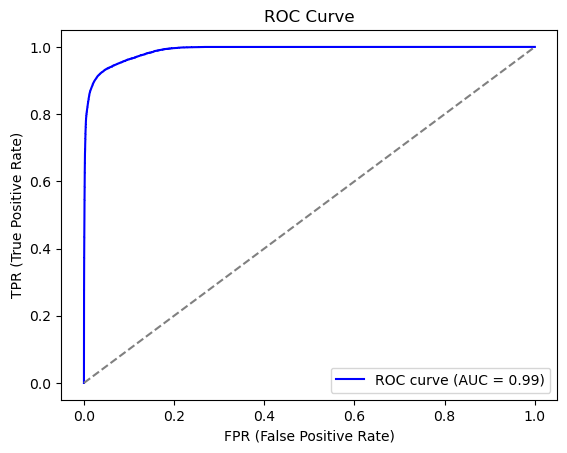

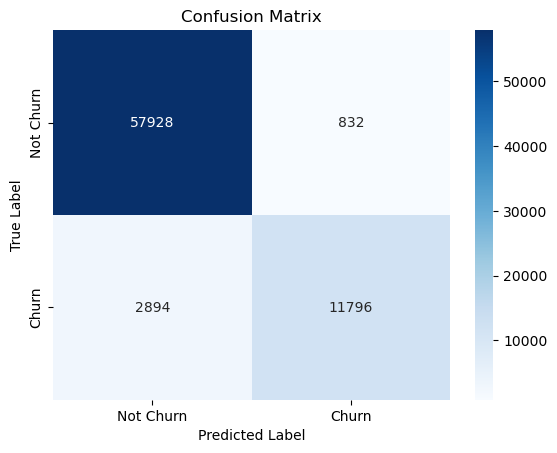

In [54]:
# ROC Curve
fpr, tpr, thresholds = rf_curve_over[2]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
# cm = confusion_matrix(y_val, y_pred_rf)
cm = rf_matrix_over[4]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


클러스터링 체크

In [5]:
total_res = pd.concat([X_res, y_res], axis=1)

In [17]:
from sklearn.cluster import DBSCAN
kmeans = DBSCAN(eps=0.05, min_samples=100)
kmeans.fit(X_res)
total_res['cluster'] = kmeans.labels_
total_res['cluster_chk'] = (total_res['is_churn'] == total_res['cluster']).astype('int')

total_res['cluster'].value_counts(), total_res['cluster_chk'].value_counts()

(cluster
 -1    587606
 Name: count, dtype: int64,
 cluster_chk
 0    587606
 Name: count, dtype: int64)

In [18]:
from sklearn.cluster import SpectralClustering
kmeans = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_init=10)
kmeans.fit(X_res)
total_res['cluster'] = kmeans.labels_
total_res['cluster_chk'] = (total_res['is_churn'] == total_res['cluster']).astype('int')

total_res['cluster'].value_counts(), total_res['cluster_chk'].value_counts()

KeyboardInterrupt: 

In [10]:
from sklearn.mixture import GaussianMixture
kmeans = GaussianMixture(n_components=30, covariance_type='spherical')
kmeans.fit(X_res)
total_res['cluster'] = kmeans.predict(X_res)
# total_res['cluster_chk'] = (total_res['is_churn'] == total_res['cluster']).astype('int')
total_res['cluster_chk'] = total_res['cluster'].astype('str') + total_res['is_churn'].astype('str')
total_res['cluster'].value_counts(), total_res['cluster_chk'].value_counts().sort_index()

(cluster
 25    47387
 15    46301
 8     46175
 26    45219
 0     45108
 27    42990
 18    40827
 10    40017
 19    36820
 6     35820
 12    30879
 16    28020
 24    24281
 3     20343
 17    16438
 9     12283
 29     9506
 21     6755
 13     5025
 22     3856
 23     3171
 11      348
 2        12
 1        10
 4         5
 7         5
 28        2
 20        1
 5         1
 14        1
 Name: count, dtype: int64,
 cluster_chk
 00     22213
 01     22895
 10         9
 100    20813
 101    19204
 11         1
 110      194
 111      154
 120    17000
 121    13879
 130     3000
 131     2025
 140        1
 150    20680
 151    25621
 160    15767
 161    12253
 170     9494
 171     6944
 180    21708
 181    19119
 190    19708
 191    17112
 200        1
 21        12
 210     4046
 211     2709
 220     2178
 221     1678
 230     1929
 231     1242
 240    13966
 241    10315
 250    18346
 251    29041
 260    21572
 261    23647
 270    22180
 271    20810
 280        2


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(X_res)
total_res['cluster'] = kmeans.labels_
total_res['cluster_chk'] = (total_res['is_churn'] == total_res['cluster']).astype('int')

total_res['cluster'].value_counts(), total_res['cluster_chk'].value_counts()

cluster_chk
0    293811
1    293795
Name: count, dtype: int64

### XGBoost

In [ ]:
# # 최적의 파라미터 찾기 - GridSearchCV
# param_grid = {
#     'max_depth': [7,10,15,20,25,30],
#     'learning_rate': [0.2,0.3,0.4,0.5],
#     'n_estimators': [300, 400,500,700],
#     'subsample': [1.0],
#     'colsample_bytree': [1.0],
#     'min_child_weight': [5,7,10,15]
# }

# stratified_kfold = StratifiedKFold(n_splits=5)

# grid_search = GridSearchCV(
#     estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, tree_method="gpu_hist"),
#     param_grid=param_grid,
#     scoring='f1',
#     cv=stratified_kfold,
#     verbose=1,
#     n_jobs=-1
# )

# # GridSearchCV 실행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터 출력
# print(f"🏆 최적의 하이퍼파라미터: {grid_search.best_params_}")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


ValueError: 
All the 1920 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:44] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:44] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:45] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:45] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:47] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:47] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:48] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:48] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:51] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:51] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:57] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:57] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:58] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:58] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:48:59] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:48:59] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:00] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:00] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:01] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:01] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:02] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:02] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:44] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:44] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:45] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:45] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:47] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:47] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:48] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:48] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:51] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:51] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:57] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:57] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:58] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:58] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:49:59] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:49:59] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:00] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:00] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:01] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:01] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:02] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:02] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 2100, in update
    _check_call(
  File "c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:50:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [13:50:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device



In [8]:
stratified_kfold = StratifiedKFold(n_splits=5)
xgb_clf = XGBClassifier(colsample_bytree= 0.9619002092279432, gamma= 0.1743329936458647, learning_rate= 0.029852965327426227, max_depth= 11, min_child_weight= 1, n_estimators= 473, subsample= 0.8773470692601075, random_state=42)

xgb_accuracy=[]
xgb_precision=[]
xgb_recall=[]
xgb_matrix=[]
xgb_curve=[]

for train_index, val_index in stratified_kfold.split(X, y):
  X_train_1, y_train_1 = X.iloc[train_index], y.iloc[train_index]
  X_val, y_val = X.iloc[val_index], y.iloc[val_index]
  
  scaler = StandardScaler()
  X_train_scaled_1 = scaler.fit_transform(X_train_1)
  X_test_scaled_1 = scaler.transform(X_val)

  xgb_clf.fit(X_train_scaled_1, y_train_1)
  y_pred_xgb = xgb_clf.predict(X_test_scaled_1)
  y_pred_proba = xgb_clf.predict_proba(X_test_scaled_1)[:, 1]

  xgb_accuracy.append(accuracy_score(y_val, y_pred_xgb))
  xgb_precision.append(precision_score(y_val, y_pred_xgb))
  xgb_recall.append(recall_score(y_val, y_pred_xgb))
  xgb_matrix.append(confusion_matrix(y_val, y_pred_xgb))
  xgb_curve.append(roc_curve(y_val, y_pred_proba))

print("xgboost 정확도:", round(np.mean(xgb_accuracy),3))
print("xgboost 정밀도:", round(np.mean(xgb_precision),3))
print("xgboost 재현율:", round(np.mean(xgb_recall),3))

xgboost 정확도: 0.889
xgboost 정밀도: 0.733
xgboost 재현율: 0.579


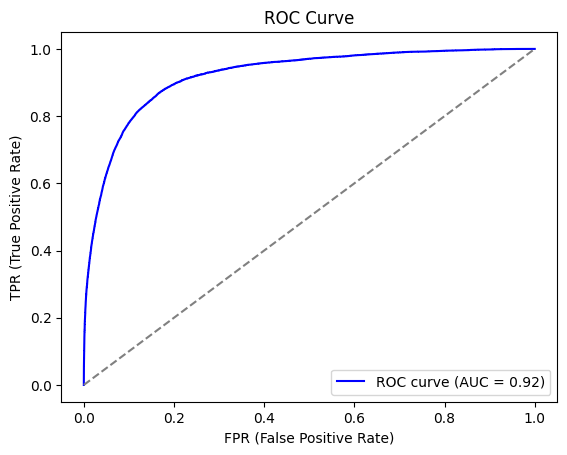

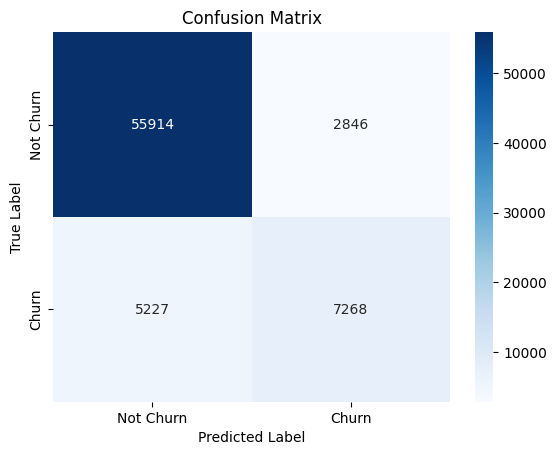

In [9]:
# ROC Curve
fpr, tpr, thresholds = xgb_curve[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = confusion_matrix(y_val, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### XGBoost 오버샘플링

In [ ]:
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'min_child_weight': [1, 3, 5]
# }

# stratified_kfold = StratifiedKFold(n_splits=5)

# xgb_clf = XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     random_state=42,
#     tree_method="gpu_hist"
# )

# grid_search = GridSearchCV(
#     estimator=xgb_clf,
#     param_grid=param_grid,
#     scoring='f1',
#     cv=stratified_kfold,
#     verbose=1,
#     n_jobs=-1
# )

# grid_search.fit(X_res_scaled, y_res)

# # 최적의 파라미터 출력
# print(f"🏆 최적의 하이퍼파라미터: {grid_search.best_params_}")

In [19]:
stratified_kfold = StratifiedKFold(n_splits=5)
xgb_clf_over = XGBClassifier(learning_rate= 0.2543601546034454, max_depth= 15, n_estimators= 387, random_state=42)

xgb_accuracy_over=[]
xgb_precision_over=[]
xgb_recall_over=[]
xgb_matrix_over=[]
xgb_curve_over=[]

for train_index, val_index in stratified_kfold.split(X_res, y_res):
  X_train_1, y_train_1 = X_res.iloc[train_index], y_res.iloc[train_index]
  X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]
  
  scaler = StandardScaler()
  X_train_scaled_1 = scaler.fit_transform(X_train_1)
  X_test_scaled_1 = scaler.transform(X_val)

  xgb_clf_over.fit(X_train_scaled_1, y_train_1)
  y_pred_xgb = xgb_clf_over.predict(X_test_scaled_1)
  y_pred_proba = xgb_clf_over.predict_proba(X_test_scaled_1)[:, 1]

  xgb_accuracy_over.append(accuracy_score(y_val, y_pred_xgb))
  xgb_precision_over.append(precision_score(y_val, y_pred_xgb))
  xgb_recall_over.append(recall_score(y_val, y_pred_xgb))
  xgb_matrix_over.append(confusion_matrix(y_val, y_pred_xgb))
  xgb_curve_over.append(roc_curve(y_val, y_pred_proba))

print("xgboost 정확도:", round(np.mean(xgb_accuracy_over),3))
print("xgboost 정밀도:", round(np.mean(xgb_precision_over),3))
print("xgboost 재현율:", round(np.mean(xgb_recall_over),3))

xgboost 정확도: 0.958
xgboost 정밀도: 0.924
xgboost 재현율: 0.998


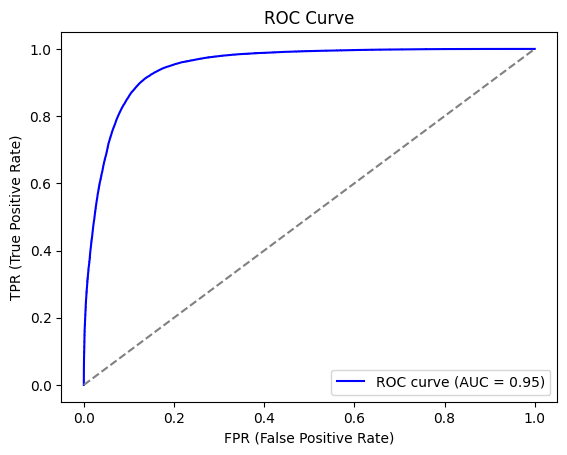

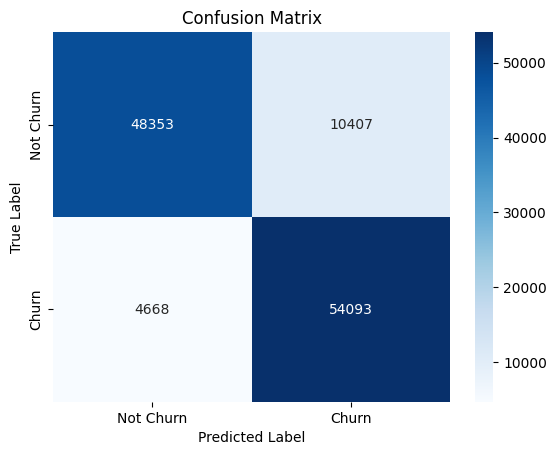

In [13]:
# ROC Curve
fpr, tpr, thresholds = xgb_curve_over[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = confusion_matrix(y_val, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### LightGBM

In [ ]:
# model = lgb.LGBMClassifier()

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
#     'max_depth': [3, 5, 7, 10],                # 트리의 최대 깊이
#     'n_estimators': [50, 100, 150]             # 추정기 수
# }
# skf = StratifiedKFold(n_splits=5)
# # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1, scoring='accuracy')

# # 훈련 데이터로 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print("Best hyperparameters: ", grid_search.best_params_)

In [70]:
stratified_kfold = StratifiedKFold(n_splits=5)
lgbm_clf = lgb.LGBMClassifier(learning_rate= 0.3, max_depth= 20, n_estimators= 2000, random_state=42)

lgbm_accuracy = []
lgbm_precision = []
lgbm_recall = []
lgbm_matrix = []
lgbm_curve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train_1, y_train_1 = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
  
    scaler = StandardScaler()
    X_train_scaled_1 = scaler.fit_transform(X_train_1)
    X_test_scaled_1 = scaler.transform(X_val)

    lgbm_clf.fit(X_train_scaled_1, y_train_1)
    y_pred_lgbm = lgbm_clf.predict(X_test_scaled_1)
    y_pred_proba = lgbm_clf.predict_proba(X_test_scaled_1)[:, 1]

    lgbm_accuracy.append(accuracy_score(y_val, y_pred_lgbm))
    lgbm_precision.append(precision_score(y_val, y_pred_lgbm))
    lgbm_recall.append(recall_score(y_val, y_pred_lgbm))
    lgbm_matrix.append(confusion_matrix(y_val, y_pred_lgbm))
    lgbm_curve.append(roc_curve(y_val, y_pred_proba))

print("LightGBM 정확도:", round(np.mean(lgbm_accuracy),3))
print("LightGBM 정밀도:", round(np.mean(lgbm_precision),3))
print("LightGBM 재현율:", round(np.mean(lgbm_recall),3))

[LightGBM] [Info] Number of positive: 49979, number of negative: 235042
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3708
[LightGBM] [Info] Number of data points in the train set: 285021, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175352 -> initscore=-1.548161
[LightGBM] [Info] Start training from score -1.548161
[LightGBM] [Info] Number of positive: 49979, number of negative: 235042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3698
[LightGBM] [Info] Number of data points in the train set: 285021, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175352 -> initscore=-1.54816

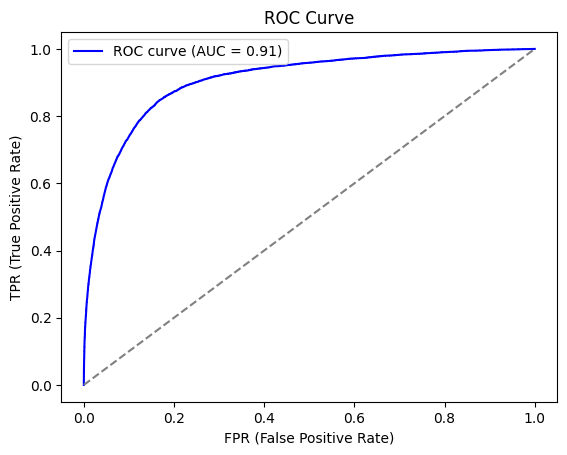

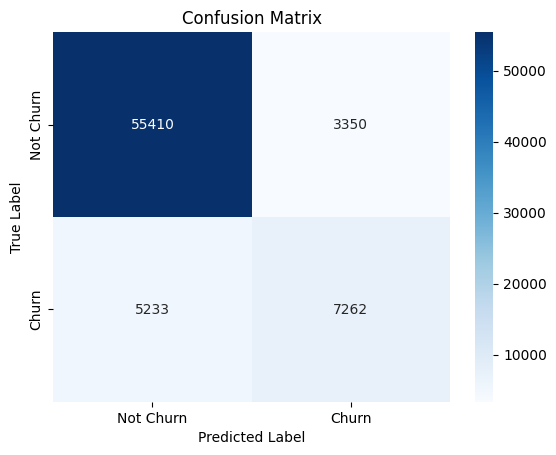

In [71]:
# ROC Curve
fpr, tpr, thresholds = lgbm_curve[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = confusion_matrix(y_val, y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### LightGBM 오버샘플링

In [ ]:
# # LightGBM 모델 정의
# model = lgb.LGBMClassifier()

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
#     'max_depth': [3, 5, 7, 10],                # 트리의 최대 깊이
#     'n_estimators': [50, 100, 150]             # 추정기 수
# }
# skf = StratifiedKFold(n_splits=5)
# # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1, scoring='accuracy')

# # 훈련 데이터로 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print("Best hyperparameters: ", grid_search.best_params_)

In [68]:
stratified_kfold = StratifiedKFold(n_splits=5)
lgbm_clf_over = lgb.LGBMClassifier(learning_rate= 0.4, max_depth= 30, n_estimators= 1500, random_state=42)

lgbm_accuracy_over = []
lgbm_precision_over = []
lgbm_recall_over = []
lgbm_matrix_over = []
lgbm_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train_1, y_train_1 = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]
  
    scaler = StandardScaler()
    X_train_scaled_1 = scaler.fit_transform(X_train_1)
    X_test_scaled_1 = scaler.transform(X_val)

    lgbm_clf_over.fit(X_train_scaled_1, y_train_1)
    y_pred_lgbm = lgbm_clf_over.predict(X_test_scaled_1)
    y_pred_proba = lgbm_clf_over.predict_proba(X_test_scaled_1)[:, 1]

    lgbm_accuracy_over.append(accuracy_score(y_val, y_pred_lgbm))
    lgbm_precision_over.append(precision_score(y_val, y_pred_lgbm))
    lgbm_recall_over.append(recall_score(y_val, y_pred_lgbm))
    lgbm_matrix_over.append(confusion_matrix(y_val, y_pred_lgbm))
    lgbm_curve_over.append(roc_curve(y_val, y_pred_proba))

print("LightGBM 정확도:", round(np.mean(lgbm_accuracy_over),3))
print("LightGBM 정밀도:", round(np.mean(lgbm_precision_over),3))
print("LightGBM 재현율:", round(np.mean(lgbm_recall_over),3))

[LightGBM] [Info] Number of positive: 235042, number of negative: 235042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3771
[LightGBM] [Info] Number of data points in the train set: 470084, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 235043, number of negative: 235042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3772
[LightGBM] [Info] Number of data points in the train set: 470085, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initsco

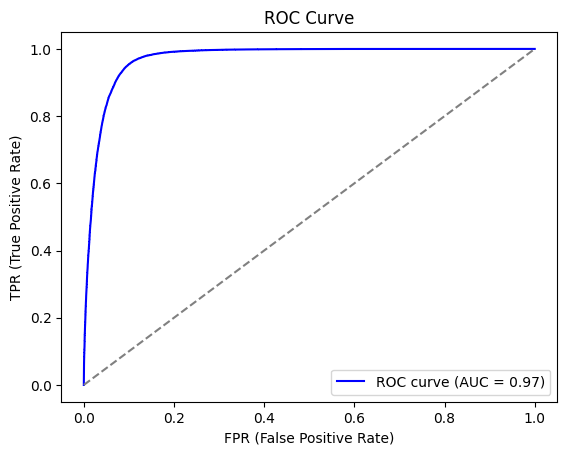

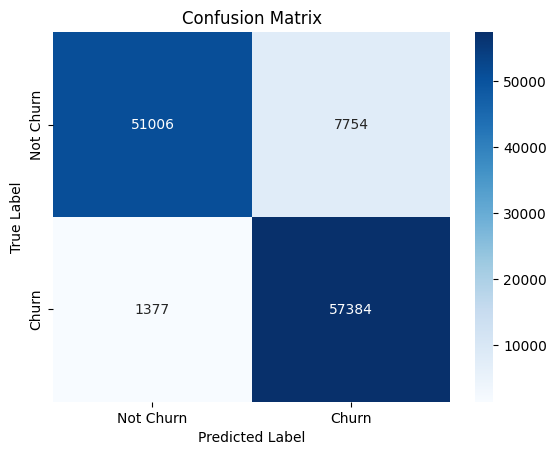

In [69]:
# ROC Curve
fpr, tpr, thresholds = lgbm_curve_over[4]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Plot
cm = confusion_matrix(y_val, y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()